In [3]:
from sklearn.decomposition import PCA 
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from sklearn.svm import SVC

In [4]:
iris=sns.load_dataset("iris")

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X=iris.iloc[:100,2:4]
y=iris.iloc[0:100,4]


In [6]:
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [86]:
model=SVC(kernel='linear')

In [87]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [88]:
y_pred=model.predict(X_test)

In [89]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [90]:
vec=model.support_vectors_

In [91]:
vec

array([[1.7, 0.5],
       [1.9, 0.2],
       [3. , 1.1]])

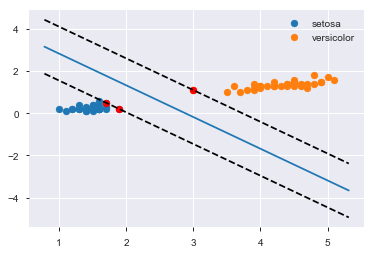

In [92]:
plt.scatter(X_train[y_train=="setosa"].iloc[:,0],X_train[y_train=="setosa"].iloc[:,1],label="setosa")
#plt.scatter(X_train[y_train=="virginica"].iloc[:,0],X_train[y_train=="virginica"].iloc[:,1],label="virginica")
plt.scatter(X_train[y_train=="versicolor"].iloc[:,0],X_train[y_train=="versicolor"].iloc[:,1],label="versicolor")
plt.scatter(vec[:,0],vec[:,1],color="red")
ax = plt.gca()
xlim = ax.get_xlim()
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - model.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (model.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (model.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.legend(loc="best")

In [93]:
X=iris.iloc[:100,0:2]
y=iris.iloc[0:100,4]
X_train,X_test,y_train,y_test = train_test_split(X,y)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy",metrics.accuracy_score(y_test,y_pred))
vec=model.support_vectors_

accuracy 1.0


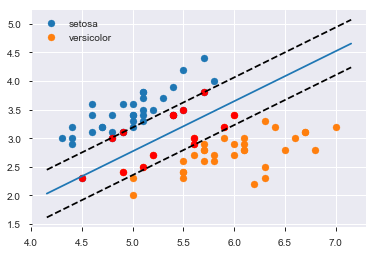

In [94]:
plt.scatter(X_train[y_train=="setosa"].iloc[:,0],X_train[y_train=="setosa"].iloc[:,1],label="setosa")
#plt.scatter(X_train[y_train=="virginica"].iloc[:,0],X_train[y_train=="virginica"].iloc[:,1],label="virginica")
plt.scatter(X_train[y_train=="versicolor"].iloc[:,0],X_train[y_train=="versicolor"].iloc[:,1],label="versicolor")
plt.scatter(vec[:,0],vec[:,1],color="red")
ax = plt.gca()
xlim = ax.get_xlim()
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - model.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (model.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (model.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.legend(loc="best")

# logisticdrawback.csv

In [8]:
data=pd.read_csv("logisticdrawback.csv")

In [9]:
data.shape

(300, 3)

In [10]:
X=data.iloc[:150,0:2]
y=data.iloc[0:150,2]
X.head()


,f1,f2
0,-1.335474,1.376236
1,-1.918388,-0.528479
2,0.015120,0.020986
3,-0.131351,0.119043
4,0.794606,1.421984


In [18]:
X=data.iloc[0:200,0:2]
y=data.iloc[0:200,2]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, shuffle=True)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy",metrics.accuracy_score(y_test,y_pred))


accuracy 0.65


In [19]:
vec=model.support_vectors_

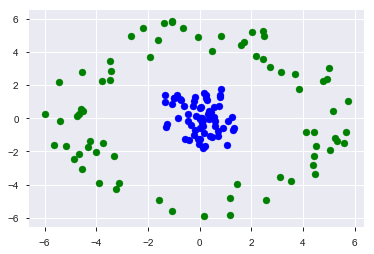

In [20]:
plt.scatter(X_train[y_train==1].iloc[:,0],X_train[y_train==1].iloc[:,1],label="1",color='blue')
plt.scatter(X_train[y_train==2].iloc[:,0],X_train[y_train==2].iloc[:,1],label="2",color='green')
#plt.scatter(X_train[y_train==3].iloc[:,0],X_train[y_train==3].iloc[:,1],label="3",color='red')
#plt.scatter(vec[:,0],vec[:,1],color="black")


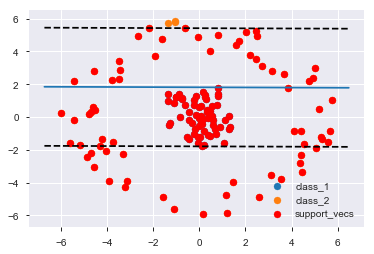

In [22]:
plt.scatter(X_train[y_train==1].iloc[:,0],X_train[y_train==1].iloc[:,1],label="class_1")
plt.scatter(X_train[y_train==2].iloc[:,0],X_train[y_train==2].iloc[:,1],label="class_2")
plt.scatter(vec[:,0],vec[:,1],color="red",label="support_vecs")
ax = plt.gca()
xlim = ax.get_xlim()
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - model.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (model.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (model.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.legend(loc="best")

# using RBF

In [8]:
model=SVC(kernel='rbf')

In [15]:
X=data.iloc[0:150,0:2]
y=data.iloc[0:150,2]
X_train,X_test,y_train,y_test = train_test_split(X,y)
model=SVC(kernel='rbf')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy",metrics.accuracy_score(y_test,y_pred))
vec=model.support_vectors_

accuracy 1.0


C:\Users\sujat\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


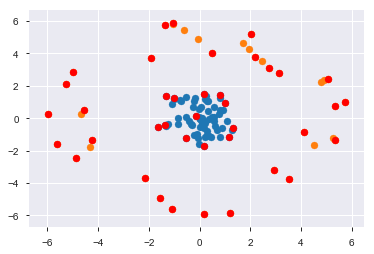

In [16]:
plt.scatter(X_train[y_train==1].iloc[:,0],X_train[y_train==1].iloc[:,1],label="class_1")
plt.scatter(X_train[y_train==2].iloc[:,0],X_train[y_train==2].iloc[:,1],label="class_2")
plt.scatter(vec[:,0],vec[:,1],color="red",label="support_vecs")
